# Predicting Customer Churn

In [64]:
#import libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mutual_info_score

#plt.rcParams["figure.figsize"] = [6, 6]
#plt.style.use('ggplot')
#plt.style.use('bmh')
#plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')
#plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-pastel')

In [36]:
# Read in the data 
df = pd.read_csv('C://Users//gleesona2//OneDrive - Flutter UK&I//Documents//WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data Cleaning

In [37]:
# Check data types 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [38]:
# Need to change some data types. Will need to change TotalCharges to a float
df['TotalCharges'].astype('float')

ValueError: could not convert string to float: ''

The above method will not work as there is blank spaces which cannot be converted into a floating point number

In [39]:
#Use this method as it will convert errors to null values 
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [40]:
# Check for Null values 
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [41]:
# null observations of the TotalCharges column
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [42]:
# Drop these values as Total charges are null values but Monthly charges are non-zero and tenure is 0, which makes no sense, these must be erroneous values. 
df.dropna(inplace=True)

In [43]:
# Check to see if there are other instances where tenure is 0 and Monthly charges are non - zero 
df.loc[(df['tenure'] == 0) & (df['MonthlyCharges'] > 0)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [44]:
df.shape

(7032, 21)

In [45]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [47]:
# Check for duplicates
df.duplicated().sum()

0

In [80]:
# Need to drop customer id column from the data as it will not help explain whether a customer will churn or not 

df.drop(columns='customerID', inplace=True)

#### Data visualisation

In [81]:
# The response variable will be churn, need to see what proportion of customers churned. 
response = df['Churn'].value_counts()
response

No     5163
Yes    1869
Name: Churn, dtype: int64

In [82]:
# Use a lambda function to get the response variable as a percentage
response_perc = response.transform(lambda x: (x/x.sum()) * 100)
response_perc

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

27% of customers churned, 73% did not. 

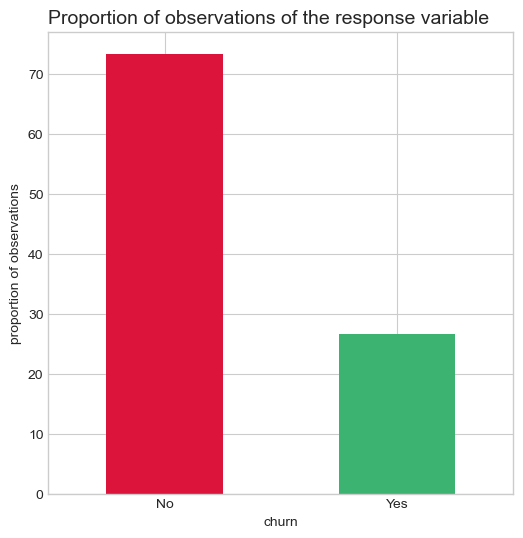

In [83]:
# create a figure - to check the imbalance of the data 
fig = plt.figure(figsize=(6, 6)) 
ax = fig.add_subplot(111)

# create a bar plot showing the percentage of churn
response_perc.plot(kind='bar', 
                   ax=ax,
                   color=['crimson','mediumseagreen'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=14, loc='left')

ax.set_xlabel('churn',
              fontsize=10)

ax.set_ylabel('proportion of observations',
              fontsize=10)

ax.tick_params(rotation='auto')


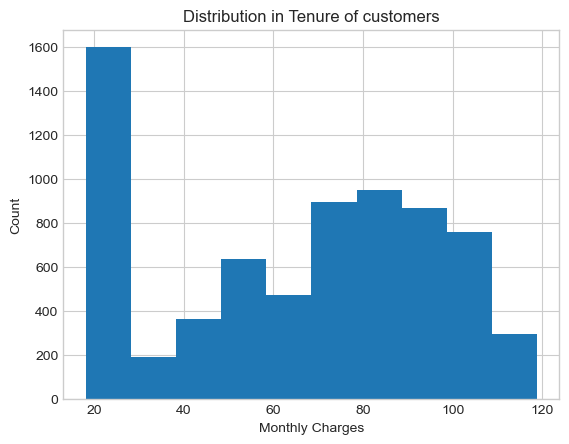

In [84]:
# Look at the distribution in tenure

tenure = df['MonthlyCharges']

plt.hist(tenure, label = 'tenure')
plt.title('Distribution in Tenure of customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
#plt.xticks(np.arange(0, 75, step=5))

plt.show()

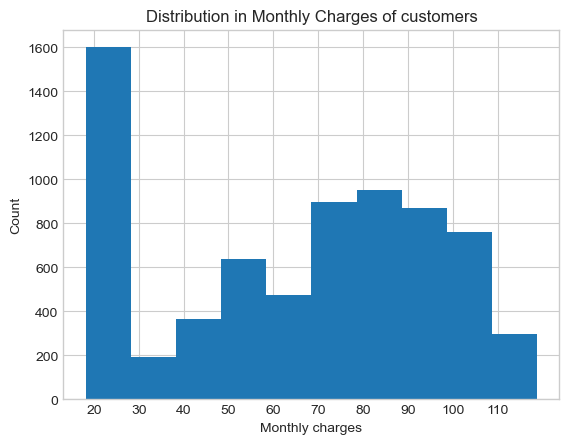

In [85]:
# Look at the distribution in monthly charges 

MonthlyCharges = df['MonthlyCharges']

plt.hist(MonthlyCharges, label = 'Monthly charges')
plt.title('Distribution in Monthly Charges of customers')
plt.xlabel('Monthly charges')
plt.ylabel('Count')
plt.xticks(np.arange(20, 120, step=10))

plt.show()

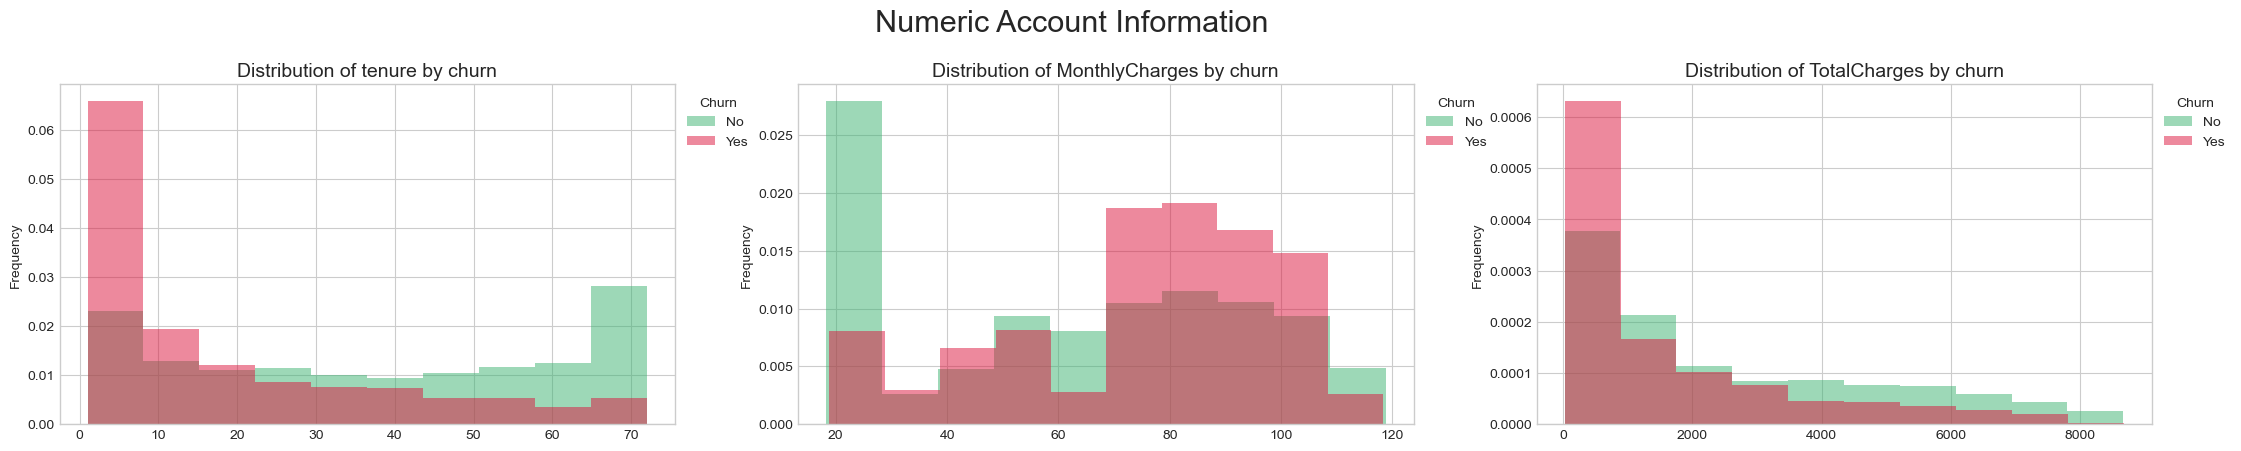

In [86]:
# Plot Numerical account information

# customer account column names
columns_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

# set number of rows and number of columns
number_of_columns = 3
number_of_rows = math.ceil(len(columns_to_plot))
super_title = 'Numeric Account Information'


# create a figure
fig = plt.figure(figsize=(27, 5 * number_of_rows)) 
fig.suptitle(super_title, fontsize=22,  y=.93)


# loop to each demographic column name to create a subplot
for index, column in enumerate(columns_to_plot, 1):

    # create the subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

    # histograms for each class (normalized histogram)
    df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True,  alpha=0.5, color='mediumseagreen', label='No')
    df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True, alpha=0.5, color='crimson', label='Yes')

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.64, 0.5, 0.5, 0.5),title='Churn', fancybox=True)

    # set title and labels
    ax.set_title('Distribution of ' + column + ' by churn',  fontsize=14, loc='center')

    ax.tick_params(rotation='auto')





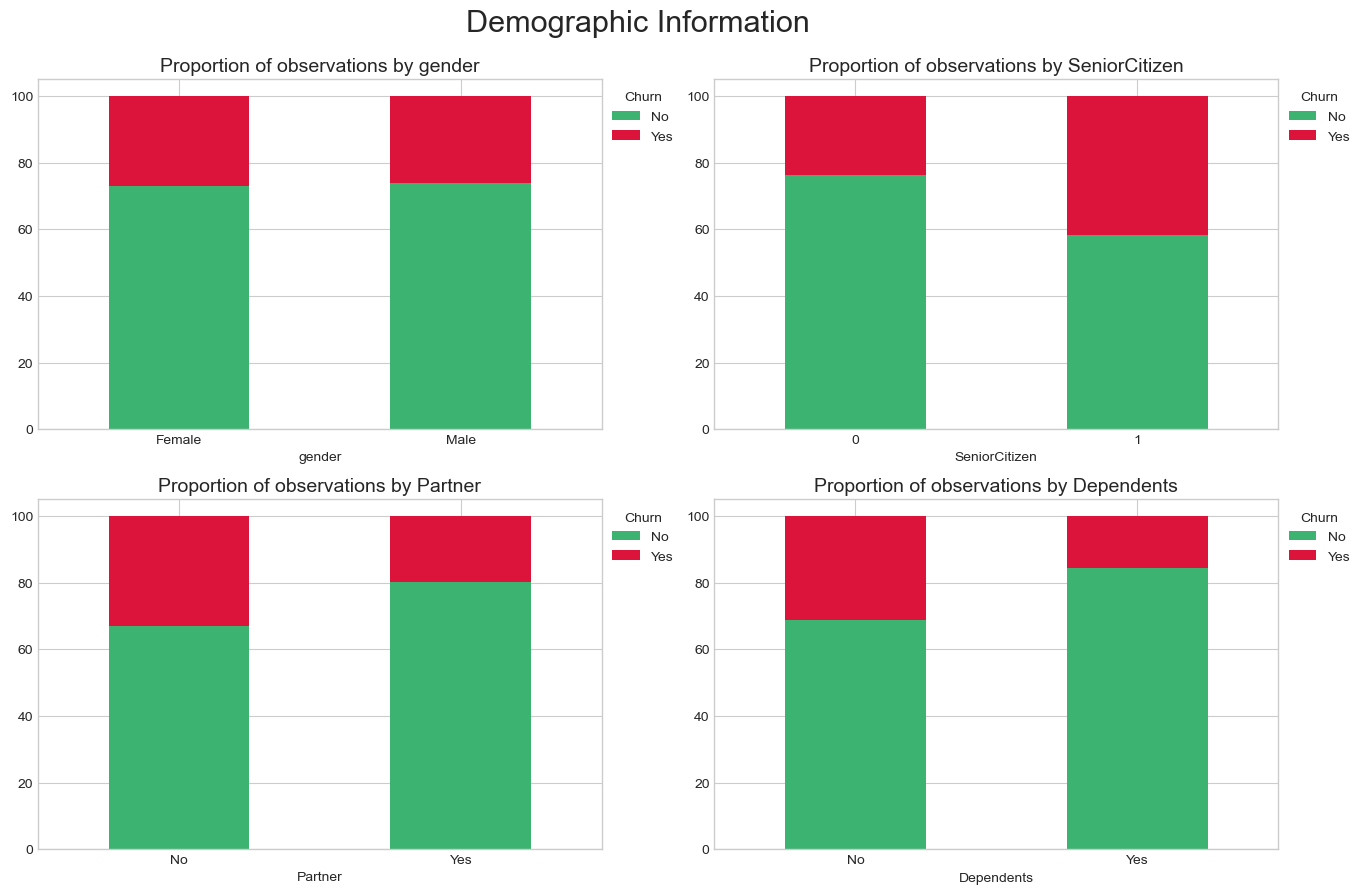

In [87]:
# Plot demographic information

columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
super_title = "Demographic Information"
number_of_columns = 2
number_of_rows = math.ceil(len(columns_to_plot)/2)

# create a figure
fig = plt.figure(figsize=(16, 5 * number_of_rows)) 
fig.suptitle(super_title, fontsize=22,  y=.95)


# loop to each column name to create a subplot
for index, column in enumerate(columns_to_plot, 1):

    # create the subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

    # calculate the percentage of observations of the response variable for each group of the independent variable
    # 100% stacked bar plot
    prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

    prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                             rot=0, color=['mediumseagreen','crimson'])

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.65, 0.5, 0.5, 0.5),
              title='Churn')#, fancybox=True)

    # set title and labels
    ax.set_title('Proportion of observations by ' + column,
                 fontsize=14, loc='center')

    ax.tick_params(rotation='auto')



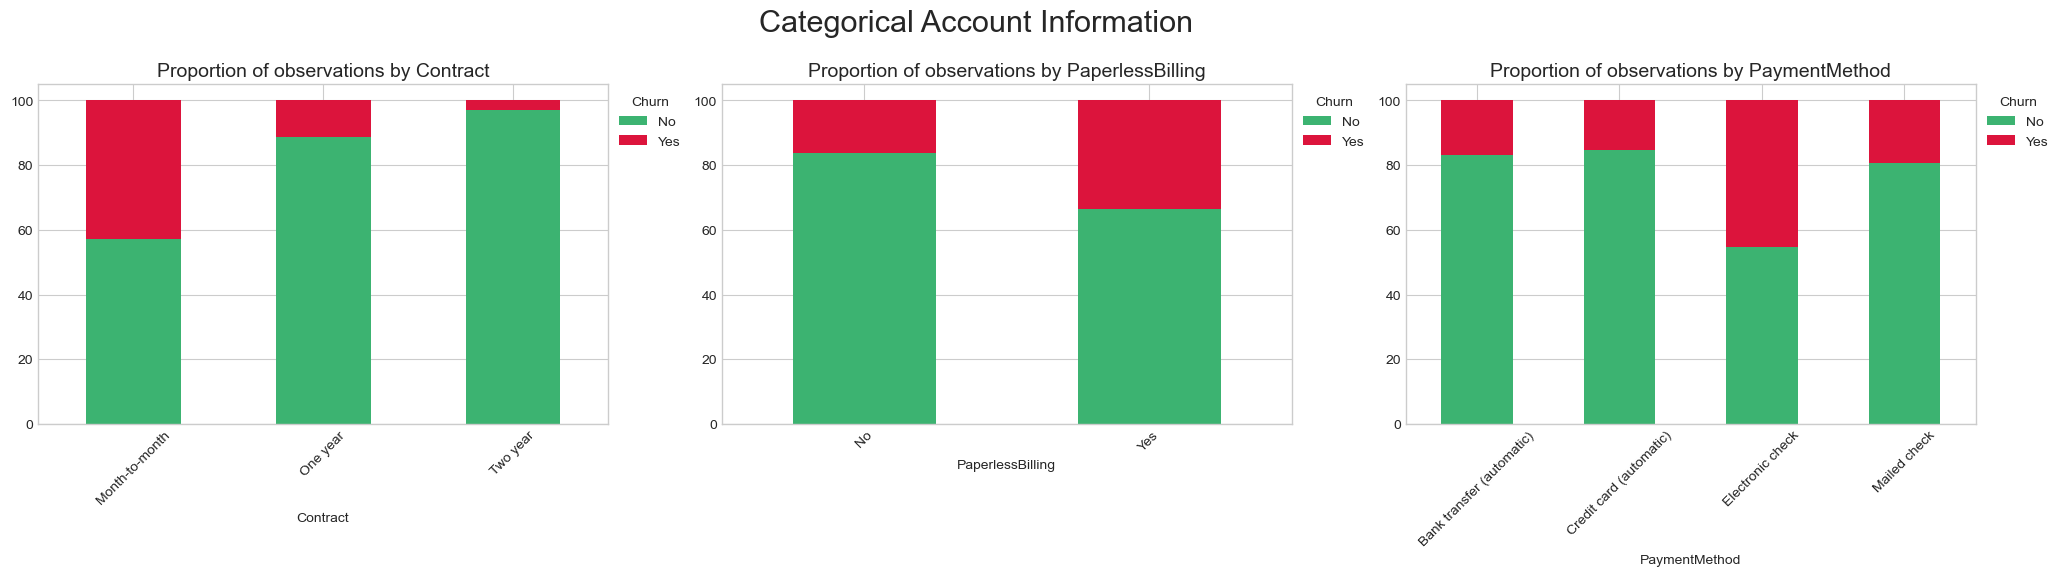

In [88]:
# Plot categorical account information

columns_to_plot = ['Contract', 'PaperlessBilling', 'PaymentMethod']
super_title = "Categorical Account Information"
number_of_columns = 3
number_of_rows = math.ceil(len(columns_to_plot))

# create a figure
fig = plt.figure(figsize=(25, 5 * number_of_rows)) 
fig.suptitle(super_title, fontsize=22,  y=.93)


# loop to each column name to create a subplot
for index, column in enumerate(columns_to_plot, 1):

    # create the subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

    # calculate the percentage of observations of the response variable for each group of the independent variable
    # 100% stacked bar plot
    prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

    prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                             rot=0, color=['mediumseagreen','crimson'])

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.65, 0.5, 0.5, 0.5),
              title='Churn')#, fancybox=True)

    # set title and labels
    ax.set_title('Proportion of observations by ' + column,
                 fontsize=14, loc='center')

    #ax.tick_params(rotation='auto')
    ax.tick_params(axis='x', rotation=45)

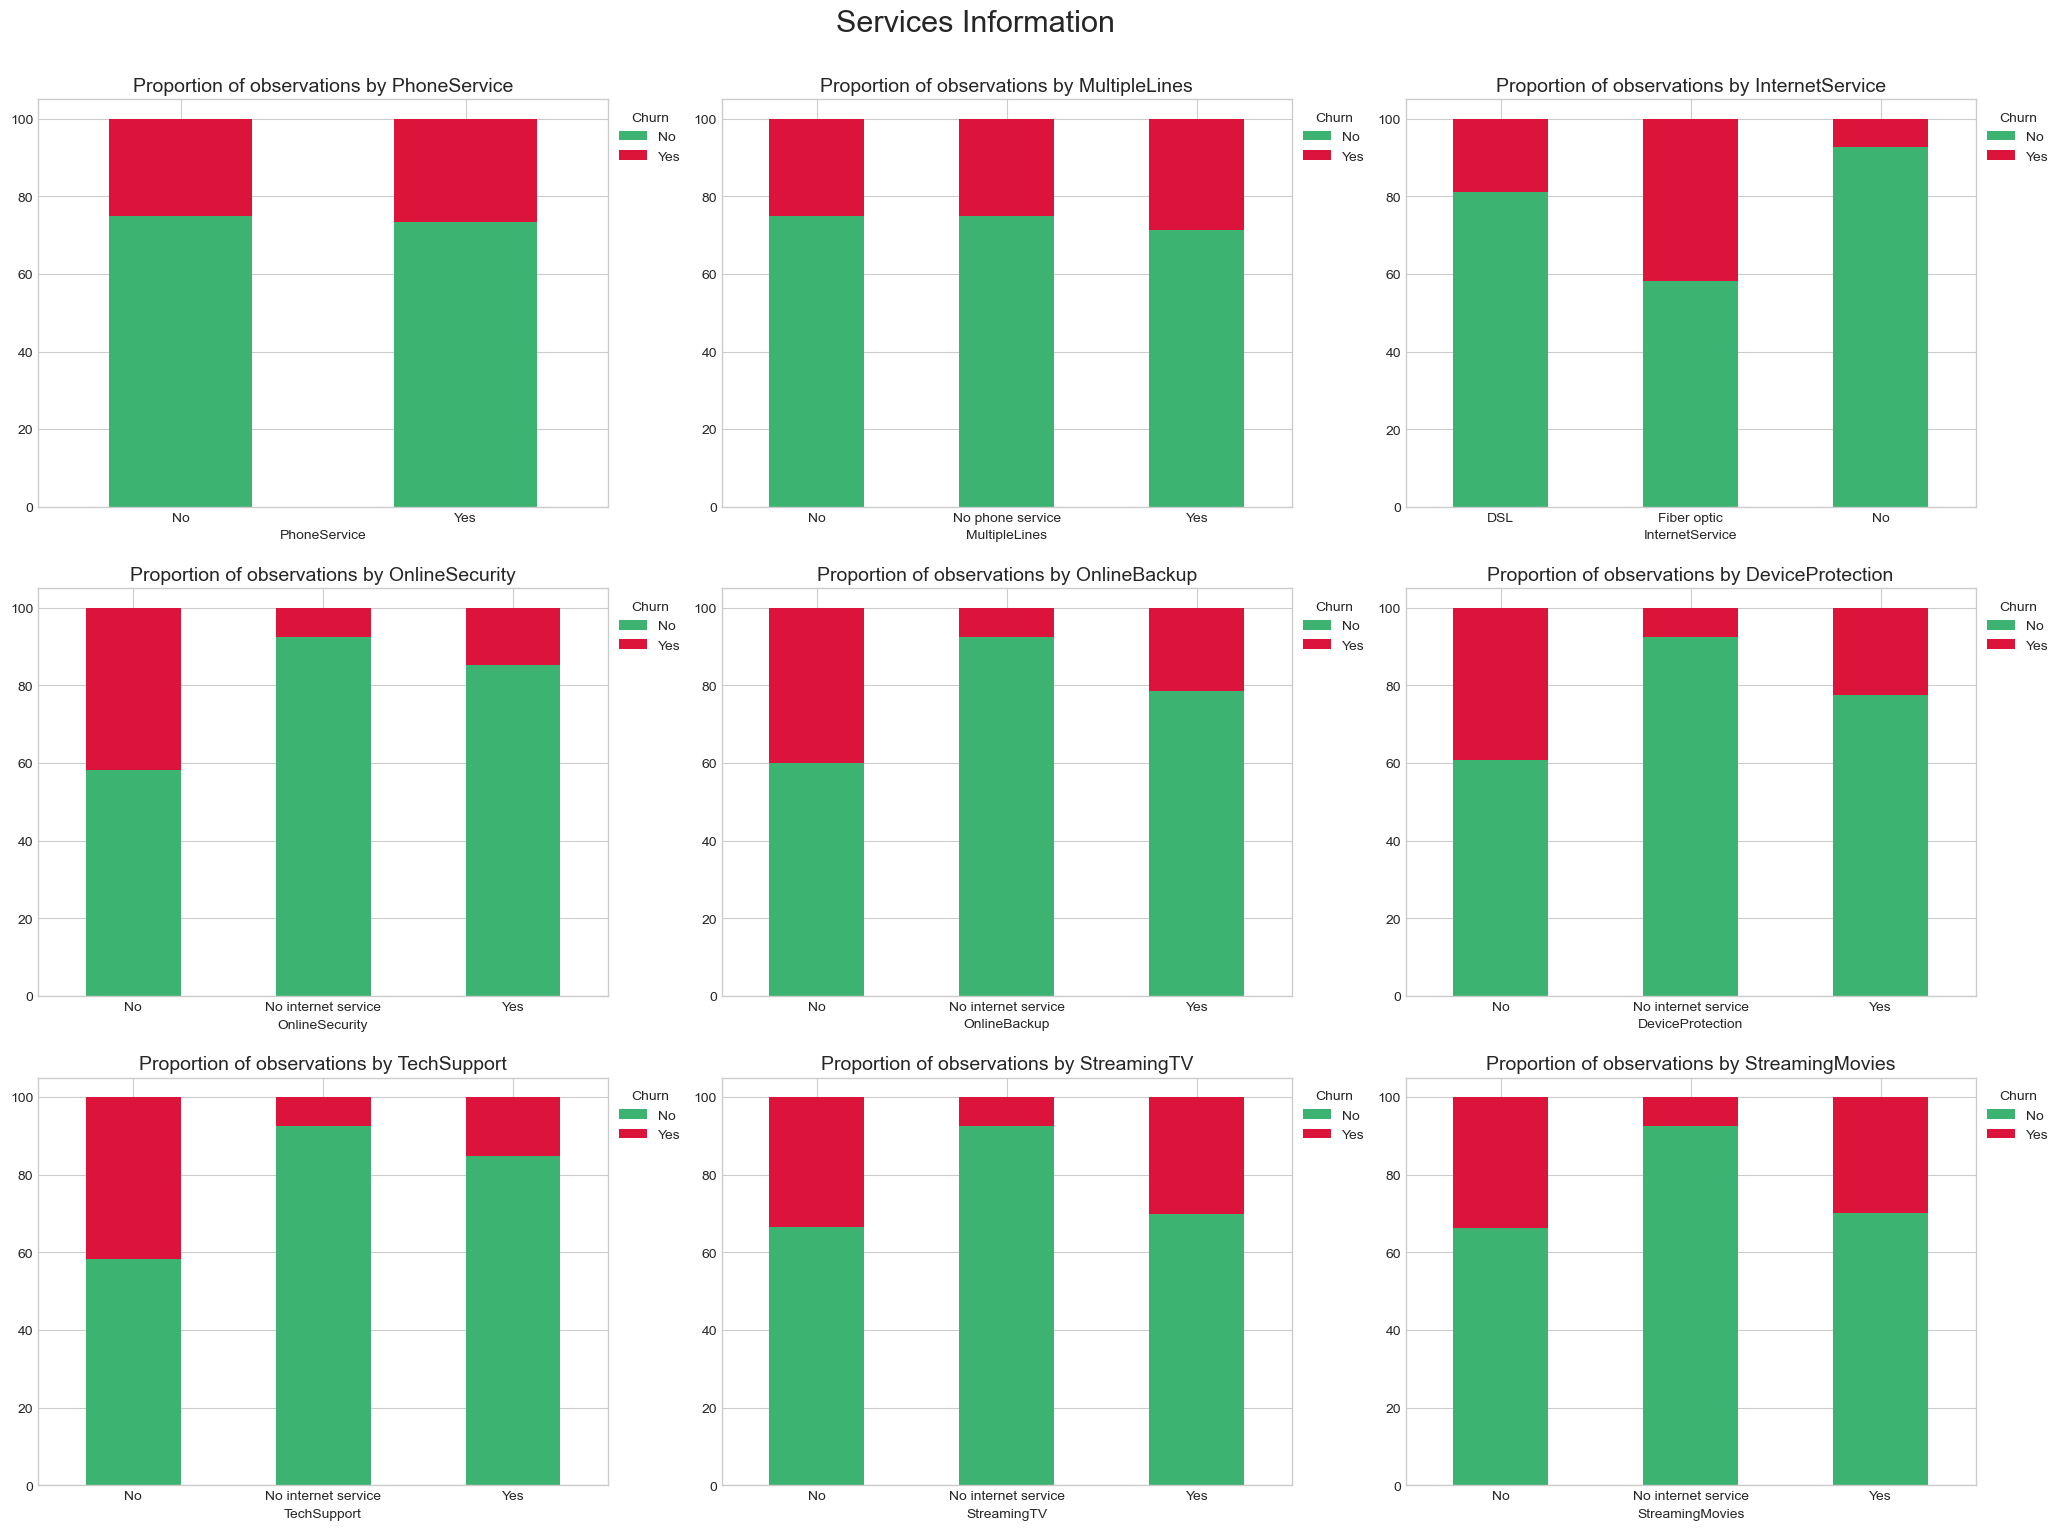

In [89]:
# Plot services information

columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
super_title = "Services Information"
number_of_columns = 3
number_of_rows = math.ceil(len(columns_to_plot)/3)

# create a figure
fig = plt.figure(figsize=(25, 6 * number_of_rows)) 
fig.suptitle(super_title, fontsize=22,  y=.93)


# loop to each column name to create a subplot
for index, col in enumerate(columns_to_plot, 1):

    # create the subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

    # calculate the percentage of observations of the response variable for each group of the independent variable
    # 100% stacked bar plot
    prop_by_independent = pd.crosstab(df[col], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

    prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['mediumseagreen','crimson'])

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.65, 0.5, 0.5, 0.5), title='Churn')#, fancybox=True)

    # set title and labels
    ax.set_title('Proportion of observations by ' + col, fontsize=14, loc='center')

    ax.tick_params(rotation='auto')
    #ax.tick_params(axis='x', rotation=45)


In [90]:
# Write a function to produce the above 

def pdf_plot(column): #, super_title):
    
    '''
     Prints a histogram for each independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''

    # start here

    # create a figure 
    fig = plt.figure(figsize= (10,10))
    #fig.suptitle('test title', fontsize=20)

    # create the subplot
    ax = fig.add_subplot(1, 1, 1)

    sns.distplot(df[df['Churn']=='Yes'][column], label='Churned', ax=ax)
    sns.distplot(df[df['Churn']=='No'][column], label='Not churned', ax=ax)


    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), title='Churn', fancybox=True)

    # set title and labels
    ax.set_title('Distribution of ' + column + ' by churn', fontsize=16, loc='center')

    ax.tick_params(rotation='auto')

C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


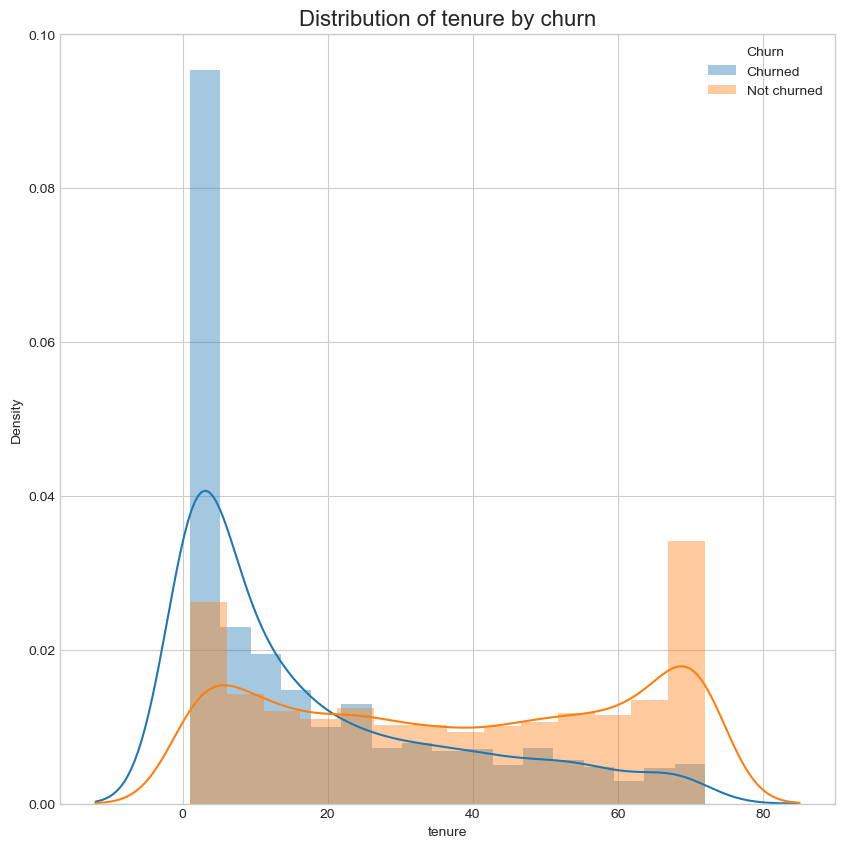

In [91]:
#Coulumn name 
column = 'tenure'
pdf_plot(column)

C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


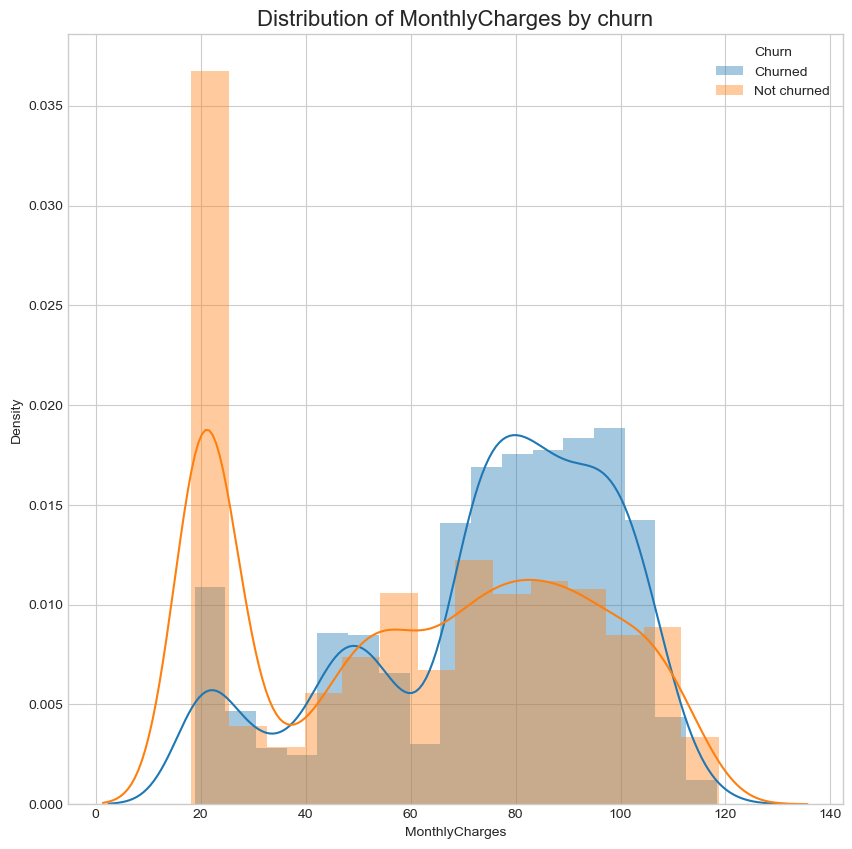

In [92]:
#Coulumn name 
column = 'MonthlyCharges'
pdf_plot(column)

C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


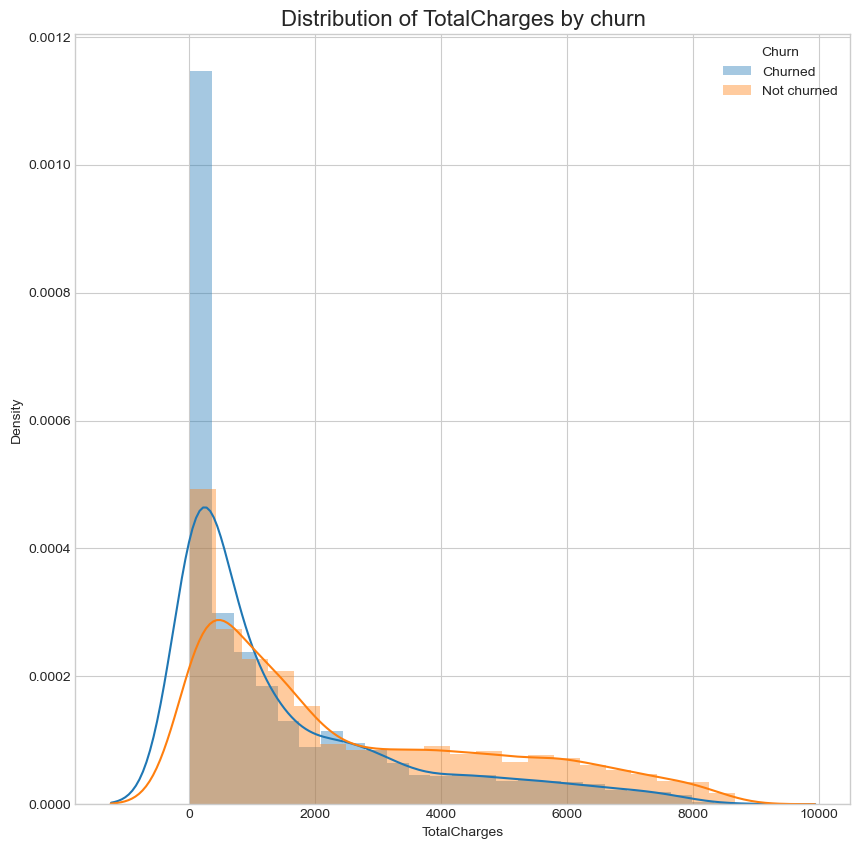

In [93]:
#Coulumn name 
column = 'TotalCharges'
pdf_plot(column)

### Feature  importance 

In [94]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
#def compute_mutual_information(categorical_serie):
#    return mutual_info_score(categorical_serie, df.Churn)

# select categorial variables (these are variables with data type 'object') and exclude the response variable (Churn)
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


<AxesSubplot:>

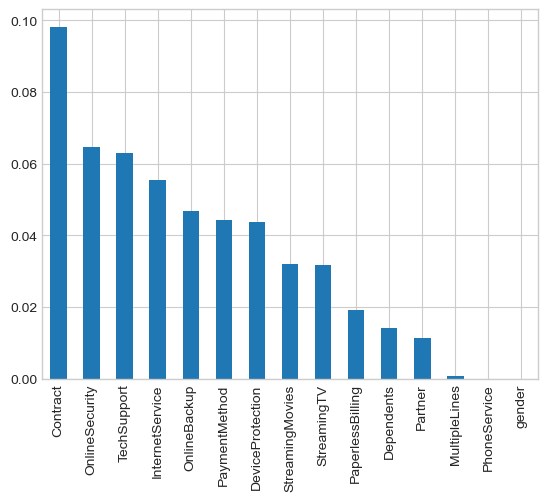

In [95]:
feature_importance.plot(kind='bar')

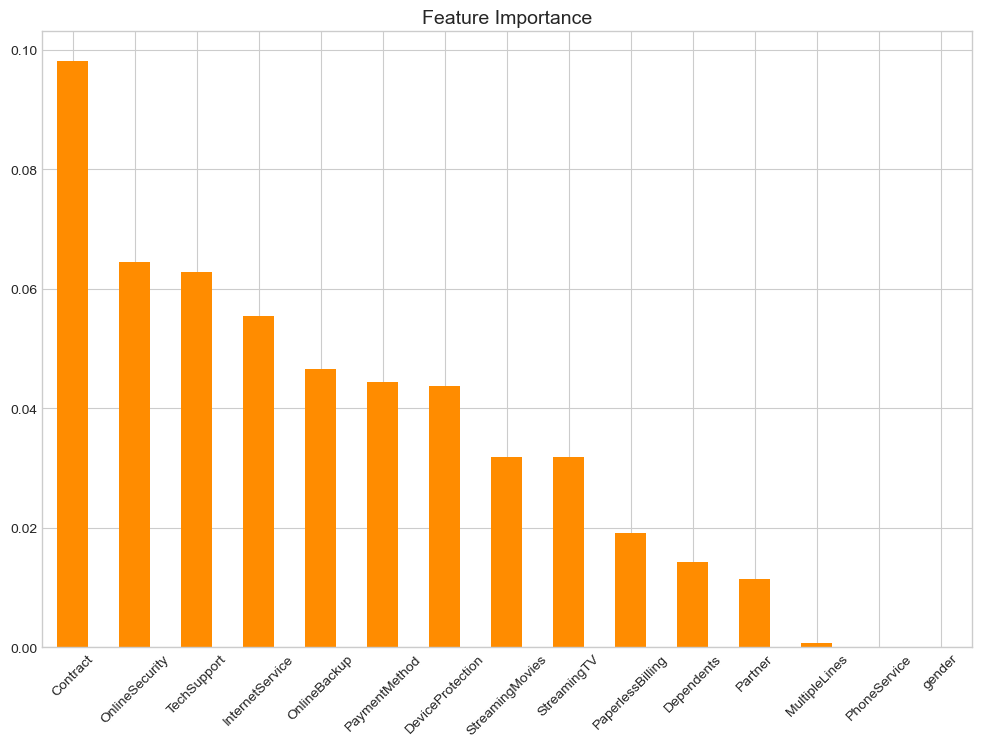

In [96]:
# create a figure
#fig = plt.figure(figsize=(8, 8)) 

# create the subplot
#ax = fig.add_subplot(1,1,1)

fig, ax = plt.subplots(figsize=(12, 8))

# calculate the percentage of observations of the response variable for each group of the independent variable

feature_importance.plot(kind='bar', ax=ax, stacked=True, rot=90, color='darkorange')
#ax.barh(feature_importance, color='darkorange')

# set title and labels
ax.set_title('Feature Importance', fontsize=14, loc='center')

#ax.tick_params(rotation='auto')
ax.tick_params(axis='x', rotation=45)

### Feature engineering